Plot of surface salinity with quivers for Eart Matters.

In [2]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from salishsea_tools import viz_tools, teos_tools, visualisations, tidetools

%matplotlib inline

In [3]:
grid_T = nc.Dataset('/results/SalishSea/nowcast/09apr16/SalishSea_1d_20160409_20160409_grid_T.nc')
grid_U = nc.Dataset('/results/SalishSea/nowcast/09apr16/SalishSea_1d_20160409_20160409_grid_U.nc')
grid_V = nc.Dataset('/results/SalishSea/nowcast/09apr16/SalishSea_1d_20160409_20160409_grid_V.nc')

lines = np.loadtxt('/data/nsoontie/MEOPAR/tools/bathymetry/thalweg_working.txt', delimiter=' ' , dtype='int')

In [4]:
grid_B = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
mesh_mask = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/mesh_mask_SalishSea2.nc')
bathy, X, Y = tidetools.get_bathy_data(grid_B)

In [5]:
t=0
sal = grid_T.variables['vosaline'][t,0,:,:]
U = grid_U.variables['vozocrtx'][t,0,:,:]
V = grid_V.variables['vomecrty'][t,0,:,:]
tmask = mesh_mask.variables['tmask'][0,0,:,:]
umask = mesh_mask.variables['umask'][0,0,:,:]
vmask = mesh_mask.variables['vmask'][0,0,:,:]

sal_m = np.ma.array(sal, mask = 1-tmask)[1:,1:]
U_m = np.ma.array(U, mask = 1-umask)
V_m = np.ma.array(V, mask = 1-vmask)

In [6]:
lons = grid_T.variables['nav_lon'][1:,1:]
lats = grid_T.variables['nav_lat'][1:,1:]

In [7]:
U_us, V_us = viz_tools.unstagger(U_m, V_m)
theta = 29
theta_rad = theta * np.pi / 180

u_E = U_us * np.cos(theta_rad) - V_us * np.sin(theta_rad)
v_N = U_us * np.sin(theta_rad) + V_us * np.cos(theta_rad)



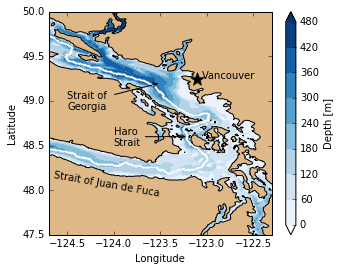

In [59]:
fig, ax = plt.subplots(1,1,figsize=(5,4))
clevels = np.arange(25,33.1,.1)
mesh = ax.contourf(X, Y, bathy,  cmap = 'Blues', extend='both')
viz_tools.plot_coastline(ax, grid_B,coords='map')
cbar = plt.colorbar(mesh, ax=ax)
cbar.set_label('Depth [m]')
ax.set_axis_bgcolor('burlywood')

ax.plot(X[lines[:,0], lines[:,1]],
        Y[lines[:,0], lines[:,1]], '.',color='w',ms=2)
st=15
#q = ax.quiver(lons[::st,::st], lats[::st,::st],
             # u_E[::st,::st], v_N[::st,::st], scale=10,color='k', pivot='middle',width=0.005)
#ax.quiverkey(q, -124.5, 47.8, .5, '50 cm/s', coordinates='data',
              #    color='k', labelcolor='black')
ax.plot(-123.1,49.25, 'k*',ms=15)
ax.text(-123.05, 49.25, 'Vancouver')

ax.set_ylim([47.5,50])
ax.set_xlim([-124.7,-122.3])

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.text(-124.65, 48.14, 'Strait of Juan de Fuca', rotation = -10)
ax.annotate('Strait of \nGeorgia', xy=(-123.5, 49.2), xytext = (-124.5,48.9),
            arrowprops=dict(arrowstyle="->"))
ax.annotate('Haro \nStrait', xy=(-123.2, 48.6), xytext = (-124,48.5),
            arrowprops=dict(arrowstyle="->"))

In [60]:
fig.savefig('SalishSeaModel_map_09apr2016.png', dpi=300, bbox_inches='tight')

Thalwg

/home/nsoontie/anaconda3/lib/python3.4/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


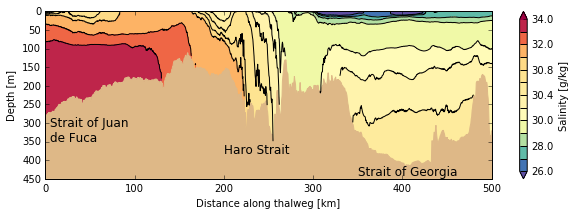

In [62]:
fig,ax=plt.subplots(1,1,figsize=(10,3))
t=0
levels =      [      26, 27, 28, 29, 30, 30.2, 30.4, 30.6, 30.8, 31, 32, 33]
sal_full = teos_tools.psu_teos(grid_T.variables['vosaline'][t,:,:,:])
tmask = mesh_mask.variables['tmask'][0,:,:,:]
sal_full= np.ma.array(sal_full, mask=1-tmask)
lines = np.loadtxt('/data/nsoontie/MEOPAR/tools/bathymetry/thalweg_working.txt', delimiter=' ' , dtype='int')
depth = mesh_mask.variables['gdept'][:]
dep_thal, distance, sal_thal = visualisations.load_thalweg(depth[0, ...], sal_full, X, Y, lines)
sal_plot = visualisations._fill_in_bathy(sal_thal, mesh_mask, lines)
CS = ax.contour(distance, dep_thal, sal_thal, levels, colors='k')
cbr = visualisations.contour_thalweg(ax, sal_full, bathy, X, Y, mesh_mask, 'gdept','salinity', cmap='Spectral_r' )

cbr.set_label('Salinity [g/kg]')
cbr.add_lines(CS)
ax.set_ylim([450,0])
ax.set_xlim([0,500])

ax.text(5,350, 'Strait of Juan \nde Fuca', fontsize=12)
ax.text(200,380,'Haro Strait', fontsize=12)
ax.text(350,440, 'Strait of Georgia', fontsize=12)

In [63]:
fig.savefig('SalishSeaModel_09apr2016_salinity_thalweg.png')